In [1]:
import numpy as np
from numpy.random import choice
from random import choice as choose
from time import time
from matplotlib.pyplot import plot
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import jit
%matplotlib inline

In [49]:
def saesGame(detail):
    xPts, yPts = [], []
    ol = 3**.5/18
    points = {"A":(-ol,5/6),
              "B":(ol,5/6),
              "C":(-2*ol,4/6),
              "D":(2*ol,4/6),
              "E":(-3*ol,3/6),
              "F":(3*ol,3/6),
              "G":(-4*ol,2/6),
              "H":(4*ol,2/6),
              "X":(0,1),
              "Y":(0,0)}
    opt = ["A","B","C","D","E","F","G","H","X","Y"]
    lasm = "Y"
    x = 0
    y = 0
    for i in range(detail):
        xPts.append(x)
        yPts.append(y)
        if lasm == "Y":
            cropt = ["X"]
        elif lasm == "X":
            cropt = opt[:]
        else:
            x = x
            y = y/2
            lasm = "X"
            continue
        move = choose(cropt)
        x = (x+points[move][0])/2
        y = (y+points[move][1])/2
        lasm = move
    return xPts, yPts, points

In [50]:
p1, p2, p3 = saesGame(10000000)

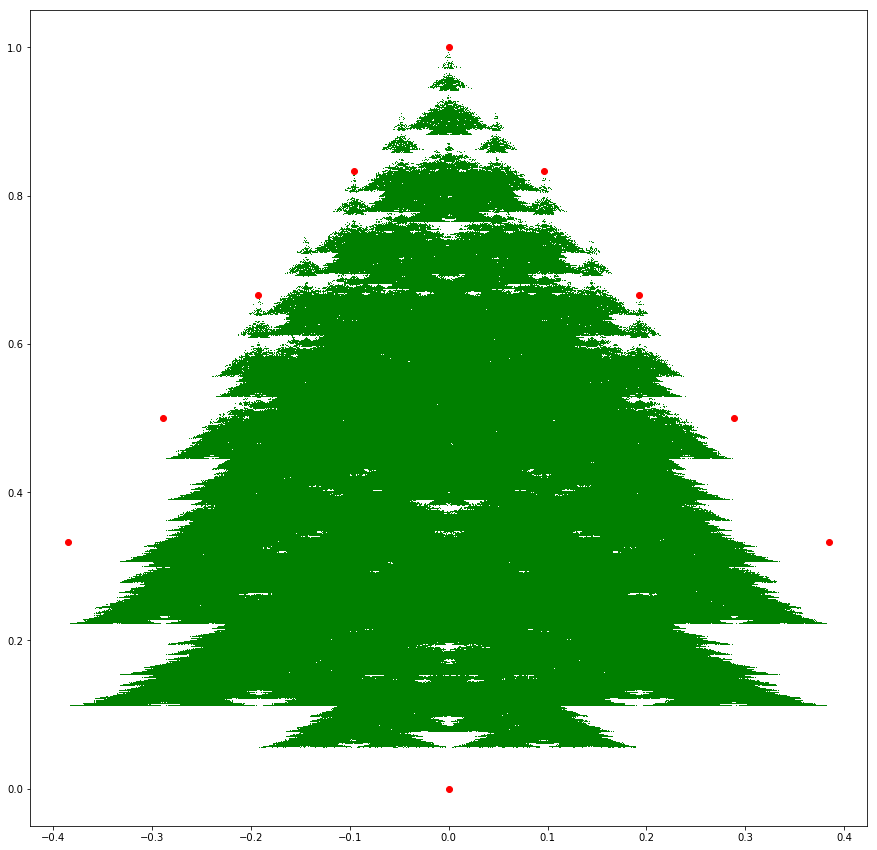

In [51]:
fig = plt.figure(figsize=[15,15])
ax = fig.gca()
ax.plot(p1, p2, 'g,')
ax.plot(*zip(*list(p3.values())),'ro')

In [6]:
def shape(sides, size = 1, rotation = np.pi/2):
    s=[]
    for i in range(sides):
        phi = rotation + i*2*np.pi/sides
        s.append([size * np.cos(phi), size * np.sin(phi)])
    return s

def chaosGame(points, rules, **k):
    dkeys = ["exclude", "detail", "zoom", "moveX", "moveY", "rotation"]
    defaults = {"exclude":[], "detail":1000000,"zoom":1,"moveX":0,"moveY":0, "rotation":np.pi/2}
    for i in range(len(defaults)):
        try:
            k[dkeys[i]]
        except KeyError:
            k[dkeys[i]] = defaults[dkeys[i]]
    if type(points) == int:
        s=[]
        for i in range(points):
            phi = k["rotation"] + i*2*np.pi/points
            s.append([np.cos(phi), np.sin(phi)])
        points = s
    print(k)
    nextPoint = [i for i in choice(len(points), k["detail"])]
    x, y, nx, ny = [], [], [], []
    mxx, mxy = max([i[0] for i in points]), max([i[1] for i in points])
    mnx, mny = min([i[0] for i in points]), min([i[1] for i in points])
    lastX, lastY = 0, 0
    lastPoint = nextPoint[0]
    for i in range(k["detail"]):
        if nextPoint[i] in [(rules[i] + lastPoint)%len(points) for i in range(len(rules))]:
            continue
        skip = False
        for j in k["exclude"]:
            if j[0][0] <= (lastX + points[nextPoint[i]][0])/2 <= j[1][0] and j[0][1] <= (lastY + points[nextPoint[i]][1])/2 <= j[1][1]:
                skip = True
        if skip:
            continue
        lastX = (lastX + points[nextPoint[i]][0])/2
        lastY = (lastY + points[nextPoint[i]][1])/2
        if (mnx+k["moveX"])/k["zoom"] <= lastX <= (mxx+k["moveX"])/k["zoom"] and (mny+k["moveY"])/k["zoom"] <= lastY <= (mxy+k["moveY"])/k["zoom"]: 
            x.append(lastX)
            y.append(lastY)
        lastPoint = nextPoint[i]
    for i in range(4):
        x.append([(mxx+k["moveX"])/k["zoom"],(mxx+k["moveX"])/k["zoom"],(mnx+k["moveX"])/k["zoom"],(mnx+k["moveX"])/k["zoom"]][i])
        y.append([(mxx+k["moveY"])/k["zoom"],(mnx+k["moveY"])/k["zoom"],(mxx+k["moveY"])/k["zoom"],(mnx+k["moveY"])/k["zoom"]][i])
    plot(x, y, ',')
    if k["zoom"] == 1:
        x,y=[],[]
        for i in points:
            x.append(i[0])
            y.append(i[1])
        x.append(points[0][0])
        y.append(points[0][1])
        plt.ion()
        for i in range(len(x)):
            plt.scatter(x[i],y[i])
            plt.pause(0.01)
        plot(x,y)

{'exclude': [], 'detail': 1000000, 'zoom': 1, 'moveX': 0, 'moveY': 0, 'rotation': 1.5707963267948966}


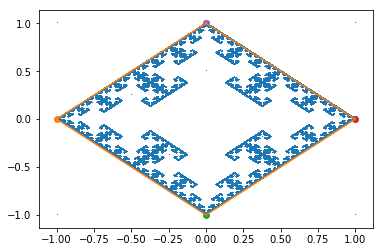

In [9]:
chaosGame(4, [2])

In [10]:
#Imports
from numpy.random import choice
from matplotlib.pyplot import plot
#If you are using Jupyter notebook, you need to uncomment the following:
%matplotlib inline

def simpleChaosGame(points, rules, detail = 1000000):
    #Get a random list of points, typically 1 million long
    nextPoint = [i for i in choice(len(points), detail)] 
    
    #Setup basic variables
    x, y = [], []
    lastX, lastY = 0, 0
    lastPoint = nextPoint[0]
    
    #Main loop
    for i in range(detail):
        lastPoint = nextPoint[i-1]
        
        #If the point is in the rules as a point you should not enter, skip to the next move
        if nextPoint[i] in [(rules[i] + lastPoint)%len(points) for i in range(len(rules))]:
            continue
            
        #Calculate the move
        lastX = (lastX + points[nextPoint[i]][0])/2
        lastY = (lastY + points[nextPoint[i]][1])/2
        
        #Add the move to the list of moves
        x.append(lastX)
        y.append(lastY)
        
    #Plot the points
    plot(x, y, ',')

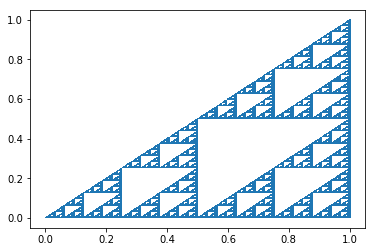

In [14]:
simpleChaosGame([[0,0],[1,0],[1,1],[1,0]], [])

In [8]:
@jit
def chaos3d(detail):
    nextPoint = choice(8, detail)
    fig = plt.figure(figsize=[15,10])
    ax = fig.gca(projection='3d')
    x, y, z = [], [], []
    lastX, lastY, lastZ = 0, 0, 0
    points = [[-1,-1,-1],[-1,-1,1],[-1,1,1],[-1,1,-1],[1,1,-1],[1,1,1],[1,-1,1],[1,-1,-1]]
    
    for i in range(1,detail):
        if nextPoint[i] in [(nextPoint[i]+5)%8]:
            continue
        
        lastX = (lastX + points[nextPoint[i-1]][0])/2
        lastY = (lastY + points[nextPoint[i-1]][1])/2
        lastZ = (lastZ + points[nextPoint[i-1]][2])/2
        
        if lastX <= 0 and lastY <= 0 and lastZ <= 0 or 1:
            x.append(lastX)
            y.append(lastY)
            z.append(lastZ)

    ax.plot(x, z, y, ',')

NameError: name 'jit' is not defined

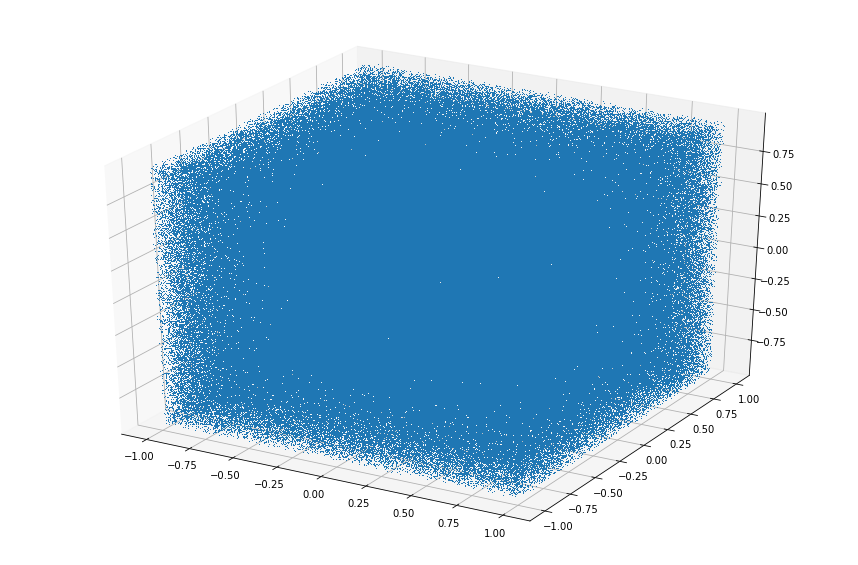

In [52]:
chaos3d(1000000)